# PMF and CDF

- Probability Mass Function (PMF)
- Cumulative Distribution Function (CDF)

In [2]:
from scipy import stats
import matplotlib.pyplot as plt

## Calculating Probability using PMF

- Used for calculating the probability of **a specific value**.
- But can also be used to calculate the probability of **a range of values**.
    - It´s more unwieldy than using the [CDF](#calculating-probability-using-cdf) for this purpose.
- `stats.binom.pmf(k, n, p)` calculates the probability of getting **exact `k` successes** in **`n`** trials with a probability of success **`p`**.
    - **successes** = `k`

**Situation**: *You have a fair coin and flip it 10 times.*

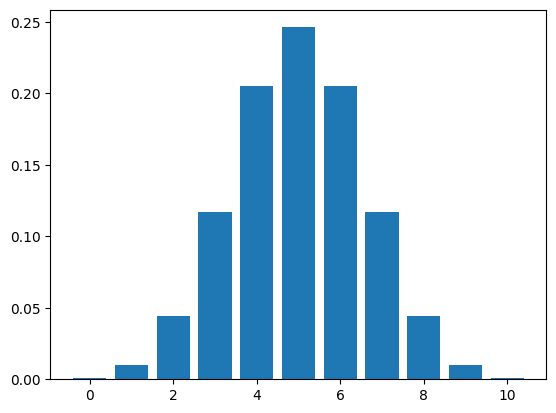

In [5]:
# Binomial distribution

lst_pmf = [stats.binom.pmf(i, 10, 0.5) for i in range(11)]
plt.bar(range(11), lst_pmf)
plt.show()

##### **What is the probability of getting exact 3 heads?**

$$ P(X=3) $$

Exact 3 heads can be obtained in different ways (*"H" for head and "T" for tail*):
- HH-HT-TT-TT-TT
- HT-HH-TT-TT-TT
- ...

In [4]:
pmf_exact_3_h = stats.binom.pmf(3, 10, 0.5)
pmf_exact_3_h

np.float64(0.11718749999999999)

##### **What is the probability of getting 3 or fewer heads?**

$$ P(X \leq 3) = P(X=0) + P(X=1) + P(X=2) + P(X=3) $$

In [23]:
pmf_3_or_fewer_h = stats.binom.pmf(0, 10, 0.5) \
    + stats.binom.pmf(1, 10, 0.5) \
    + stats.binom.pmf(2, 10, 0.5) \
    + stats.binom.pmf(3, 10, 0.5)

pmf_3_or_fewer_h_v2 = sum([stats.binom.pmf(i, 10, 0.5) for i in range(4)])

pmf_3_or_fewer_h, pmf_3_or_fewer_h_v2

(np.float64(0.17187500000000003), np.float64(0.17187500000000003))

##### **What is the probability of getting 3 to 6 heads?**

$$ P(3 \leq X \leq 6) = P(X=3) + P(X=4) + P(X=5) + P(X=6) $$

In [14]:
pmf_3_to_6_h = sum([stats.binom.pmf(i, 10, 0.5) for i in range(3, 7)])
pmf_3_to_6_h

np.float64(0.7734374999999998)

##### **What is the probability of getting 9 or fewer heads?**

$$ P(X \leq 9) = 1 - P(X=10) $$

In [22]:
pmf_9_or_fewer_h = 1 - stats.binom.pmf(10, 10, 0.5)
pmf_9_or_fewer_h_v2 = sum([stats.binom.pmf(i, 10, 0.5) for i in range(10)])

pmf_9_or_fewer_h, pmf_9_or_fewer_h_v2

(np.float64(0.9990234375), np.float64(0.9990234374999998))

##### **What is the probability of getting 2 or more heads?**

$$ P(X \geq 2) = 1 - P(X=0) - P(X=1) $$

In [24]:
pmf_2_or_more_h = 1 - stats.binom.pmf(0, 10, 0.5) - stats.binom.pmf(1, 10, 0.5)
pmf_2_or_more_h_v2 = sum([stats.binom.pmf(i, 10, 0.5) for i in range(2, 11)])

pmf_2_or_more_h, pmf_2_or_more_h_v2

(np.float64(0.9892578125), np.float64(0.9892578124999998))

## Calculating Probability using CDF

- Used for calculating the probability of **a range of values**.
- `stats.binom.cdf(k, n, p)` calculates the probability of getting **`k` or fewer** successes in **`n`** trials with a probability of success **`p`**.
    - **sucesses**: 0 to `k`.

**Situation**: *You have a fair coin and flip it 10 times.*

##### **What is the probability of getting 9 or fewer heads?**

$$ P(X \leq 6) $$

In [26]:
cdf_6_or_fewer_h = stats.binom.cdf(9, 10, 0.5)
cdf_6_or_fewer_h

np.float64(0.9990234375)

##### **What is the probability of getting 2 or more heads?**

$$ P(2 \leq X) = 1 - P(X \leq 1) $$

In [27]:
cdf_2_or_more_h = 1 - stats.binom.cdf(1, 10, 0.5)
cdf_2_or_more_h

np.float64(0.9892578125)

##### **What is the probability of getting 3 to 6 heads?**

$$ P(3 \leq X \leq 6) = P(X \leq 6) - P(X \leq 2) $$
$$ or $$
$$ P(3 \leq X \leq 6) = P(X \leq 6) - P(X < 3) $$

In [28]:
cdf_3_to_6_h = stats.binom.cdf(6, 10, 0.5) - stats.binom.cdf(2, 10, 0.5)
cdf_3_to_6_h

np.float64(0.7734375)

##### **What is the probability of getting 3 or fewer heads?**

$$ P(X \leq 3) $$

In [29]:
cdf_3_or_fewer_h = stats.binom.cdf(3, 10, 0.5)
cdf_3_or_fewer_h

np.float64(0.171875)

##### **What is the probability of getting exact 3 heads?**

$$ P(X=3) = P(X \leq 3) - P(X \leq 2) $$

- Successes of `0`, `1`, `2` and `3` heads = $ P(X \leq 3) $
- Successes of `0`, `1` and `2` heads = $ P(X \leq 2) $
- Success of exact `3` heads = $ P(X \leq 3) - P(X \leq 2) $

In [30]:
cdf_exact_3_h = stats.binom.cdf(3, 10, 0.5) - stats.binom.cdf(2, 10, 0.5)
cdf_exact_3_h

np.float64(0.1171875)